In [1]:
import gzip
import json
import re
import os
import sys
import numpy as np
import pandas as pd

C:\Users\Gautam\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Gautam\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.CSRRD7HKRKC3T3YXA7VY7TAZGLSWDKW6.gfortran-win_amd64.dll
C:\Users\Gautam\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
DIR = 'C:/Users/Gautam/Desktop/Third_Semester/Large Scale Analytics/Datasets'

In [3]:
def load_data(file_name):
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            count += 1
            data.append(d)
            if count==5000:
                break
            
    return data

In [4]:
spoilers = load_data(os.path.join(DIR, 'goodreads_reviews_spoiler.json.gz'))

In [5]:
np.random.choice(spoilers)

{'user_id': '68f9915717ccc347b5f46f1b11ec40fe',
 'timestamp': '2015-09-20',
 'review_sentences': [[0, '3.5 Not such a lady stars!'],
  [0, 'Source: eARC for Honest Review Courtesy of St.'],
  [0, "Martin's Press via NetGalley"],
  [0,
   'So a bounty hunter and a fugitive walk into a bar ...  At first this seems like it is a beginning of a joke but what it is, is a couple from opposites sides but fighting for the same thing.'],
  [0,
   "Grace is supposed to be a kick ass bounty hunter but has to fight to be appreciated,  being a girl in a man's profession."],
  [0,
   'Finally getting the chance to show her worth she has to bring in Raide Knox.'],
  [0, "The problem is that she's already met Raide and sparks flew."],
  [0,
   'How does she bring in a man who not only makes her flutter but is also way larger than her.'],
  [0,
   'She decides to seduce him as her plan, but first she has to follow him to get an idea of what makes him tick.'],
  [0,
   "Silence now, and Raide stops right

In [6]:
data=pd.DataFrame(data=spoilers)

In [7]:
data.head()


,book_id,has_spoiler,rating,review_id,review_sentences,timestamp,user_id
0,18245960,True,5,dfdbb7b0eb5a7e4c26d59a937e2e5feb,"[[0, This is a special book.], [0, It started ...",2017-08-30,8842281e1d1347389f2ab93d60773d4d
1,16981,False,3,a5d2c3628987712d0e05c4f90798eb67,"[[0, Recommended by Don Katz.], [0, Avail for ...",2017-03-22,8842281e1d1347389f2ab93d60773d4d
2,28684704,True,3,2ede853b14dc4583f96cf5d120af636f,"[[0, A fun, fast paced science fiction thrille...",2017-03-20,8842281e1d1347389f2ab93d60773d4d
3,27161156,False,0,ced5675e55cd9d38a524743f5c40996e,"[[0, Recommended reading to understand what is...",2016-11-09,8842281e1d1347389f2ab93d60773d4d
4,25884323,True,4,332732725863131279a8e345b63ac33e,"[[0, I really enjoyed this book, and there is ...",2016-04-25,8842281e1d1347389f2ab93d60773d4d


In [8]:
def plot_correlation_map( df ):
    corr = data.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [9]:
data=data.drop(columns=['timestamp'],axis=1)

In [10]:
data.head()

,book_id,has_spoiler,rating,review_id,review_sentences,user_id
0,18245960,True,5,dfdbb7b0eb5a7e4c26d59a937e2e5feb,"[[0, This is a special book.], [0, It started ...",8842281e1d1347389f2ab93d60773d4d
1,16981,False,3,a5d2c3628987712d0e05c4f90798eb67,"[[0, Recommended by Don Katz.], [0, Avail for ...",8842281e1d1347389f2ab93d60773d4d
2,28684704,True,3,2ede853b14dc4583f96cf5d120af636f,"[[0, A fun, fast paced science fiction thrille...",8842281e1d1347389f2ab93d60773d4d
3,27161156,False,0,ced5675e55cd9d38a524743f5c40996e,"[[0, Recommended reading to understand what is...",8842281e1d1347389f2ab93d60773d4d
4,25884323,True,4,332732725863131279a8e345b63ac33e,"[[0, I really enjoyed this book, and there is ...",8842281e1d1347389f2ab93d60773d4d


In [11]:
from operator import itemgetter
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [12]:
data.has_spoiler.value_counts()

False    4706
True      294
Name: has_spoiler, dtype: int64

In [13]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data.has_spoiler = le.fit_transform(data.has_spoiler)

In [14]:
data.head()

,book_id,has_spoiler,rating,review_id,review_sentences,user_id
0,18245960,1,5,dfdbb7b0eb5a7e4c26d59a937e2e5feb,"[[0, This is a special book.], [0, It started ...",8842281e1d1347389f2ab93d60773d4d
1,16981,0,3,a5d2c3628987712d0e05c4f90798eb67,"[[0, Recommended by Don Katz.], [0, Avail for ...",8842281e1d1347389f2ab93d60773d4d
2,28684704,1,3,2ede853b14dc4583f96cf5d120af636f,"[[0, A fun, fast paced science fiction thrille...",8842281e1d1347389f2ab93d60773d4d
3,27161156,0,0,ced5675e55cd9d38a524743f5c40996e,"[[0, Recommended reading to understand what is...",8842281e1d1347389f2ab93d60773d4d
4,25884323,1,4,332732725863131279a8e345b63ac33e,"[[0, I really enjoyed this book, and there is ...",8842281e1d1347389f2ab93d60773d4d


**Calculating Book Spoiler Ratio**

In [16]:
spoiler_counts = data.groupby(by='book_id').has_spoiler.agg(['sum']).reset_index().rename(columns={'sum':'spoiler_count'})
book_total_counts = data.groupby(by='book_id').has_spoiler.agg(['count']).reset_index().rename(columns={'count':'book_total_count'})
book_spoiler_ratio = pd.merge(spoiler_counts, book_total_counts, on='book_id')
book_spoiler_ratio['book_spoiler_ratio'] = book_spoiler_ratio.spoiler_count / book_spoiler_ratio.book_total_count
book_spoiler_ratio.drop(['spoiler_count','book_total_count'], axis=1, inplace=True)
#display(book_spoiler_ratio)


In [17]:
data = pd.merge(data, book_spoiler_ratio, on='book_id')
data.head()

,book_id,has_spoiler,rating,review_id,review_sentences,user_id,book_spoiler_ratio
0,18245960,1,5,dfdbb7b0eb5a7e4c26d59a937e2e5feb,"[[0, This is a special book.], [0, It started ...",8842281e1d1347389f2ab93d60773d4d,1.0
1,16981,0,3,a5d2c3628987712d0e05c4f90798eb67,"[[0, Recommended by Don Katz.], [0, Avail for ...",8842281e1d1347389f2ab93d60773d4d,0.0
2,28684704,1,3,2ede853b14dc4583f96cf5d120af636f,"[[0, A fun, fast paced science fiction thrille...",8842281e1d1347389f2ab93d60773d4d,0.5
3,28684704,0,5,31db9238ec11ca671a65a50643f952b7,"[[0, Mind-bending and completely unique, take ...",01ec1a320ffded6b2dd47833f2c8e4fb,0.5
4,27161156,0,0,ced5675e55cd9d38a524743f5c40996e,"[[0, Recommended reading to understand what is...",8842281e1d1347389f2ab93d60773d4d,0.0


**Calculating User Spoiler Ratio**

In [18]:
user_spoiler_counts = data.groupby(by='user_id').has_spoiler.agg(['sum']).reset_index().rename(columns={'sum':'user_spoiler_count'})
user_total_counts = data.groupby(by='user_id').has_spoiler.agg(['count']).reset_index().rename(columns={'count':'user_total_count'})
user_spoiler_ratio = pd.merge(user_spoiler_counts, user_total_counts, on='user_id')
user_spoiler_ratio['user_spoiler_ratio'] = user_spoiler_ratio.user_spoiler_count / user_spoiler_ratio.user_total_count
user_spoiler_ratio.drop(['user_spoiler_count','user_total_count'], axis=1, inplace=True)
#display(user_spoiler_ratio.sample(frac=1))
data = pd.merge(data, user_spoiler_ratio, on='user_id')
data.head()

,book_id,has_spoiler,rating,review_id,review_sentences,user_id,book_spoiler_ratio,user_spoiler_ratio
0,18245960,1,5,dfdbb7b0eb5a7e4c26d59a937e2e5feb,"[[0, This is a special book.], [0, It started ...",8842281e1d1347389f2ab93d60773d4d,1.0,0.084337
1,16981,0,3,a5d2c3628987712d0e05c4f90798eb67,"[[0, Recommended by Don Katz.], [0, Avail for ...",8842281e1d1347389f2ab93d60773d4d,0.0,0.084337
2,28684704,1,3,2ede853b14dc4583f96cf5d120af636f,"[[0, A fun, fast paced science fiction thrille...",8842281e1d1347389f2ab93d60773d4d,0.5,0.084337
3,27161156,0,0,ced5675e55cd9d38a524743f5c40996e,"[[0, Recommended reading to understand what is...",8842281e1d1347389f2ab93d60773d4d,0.0,0.084337
4,25884323,1,4,332732725863131279a8e345b63ac33e,"[[0, I really enjoyed this book, and there is ...",8842281e1d1347389f2ab93d60773d4d,1.0,0.084337


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
import re
from wordcloud import WordCloud, STOPWORDS

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve

import re
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist

**Plotting correlation Matrix**

In [20]:
data.describe()

,has_spoiler,rating,book_spoiler_ratio,user_spoiler_ratio
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.058800,3.877000,0.058800,0.058800
std,0.235274,1.118625,0.199986,0.078583
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.001736
50%,0.000000,4.000000,0.000000,0.017699
75%,0.000000,5.000000,0.000000,0.093750
max,1.000000,5.000000,1.000000,1.000000


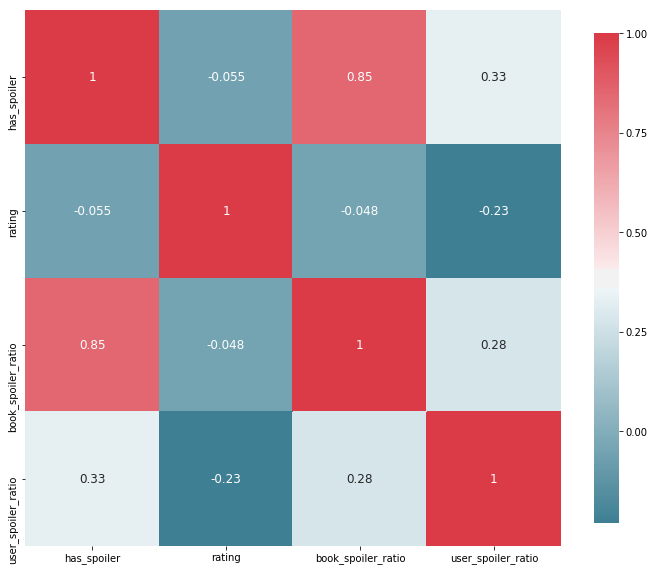

In [21]:
plot_correlation_map( data )


**Text Mining**

In [22]:
def preprocess_text(review):
    listToStr = ' '.join(map(str, review))
    listToStr = listToStr.lower() # Convert to lowercase
    listToStr = re.sub('[^a-zA-Z]',' ', listToStr) # Remove words with non-letter characters
    words = listToStr.split()
    words = [word for word in words if word not in set(stopwords.words('english'))] # Remove stop words
    listToStr = " ".join(words)
    return listToStr

In [ ]:
data['processed_review'] = data.review_sentences.apply(preprocess_text)

In [ ]:
data=data.drop(columns=['review_sentences'],axis=1)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
X=data['processed_review']
bow_transformer = CountVectorizer(analyzer=preprocess_text).fit(X)

X = bow_transformer.transform(X)


In [ ]:
data['transformed']=X


In [ ]:
data['rating'] = (data.rating - data.rating.min()) / (data.rating.max() - data.rating.min())
data=data.drop(columns=['processed_review'],axis=1)
data.head()

**Train test split**

In [203]:
y=data['has_spoiler']
data=data.drop(columns=['has_spoiler'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


**Machine Learning Models**

In [206]:
model = SVC()
model.fit(X_train, y_train)
preds = model.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, preds))
#data.review_sentences.apply(pd.Series)

C:\Users\Gautam\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9473333333333334


In [207]:
model = MultinomialNB()
model.fit(X_train, y_train)
preds = model.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, preds))

0.936


In [134]:
f1_score(y_test, preds,average=None)

C:\Users\Gautam\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.97330595, 0.        ])

In [135]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
confusion_matrix_clf=confusion_matrix(y_test, preds)
print(confusion_matrix_clf)
print(classification_report(y_test, preds))

[[1422    0]
 [  78    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1422
           1       0.00      0.00      0.00        78

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.47      0.50      0.49      1500
weighted avg       0.90      0.95      0.92      1500



C:\Users\Gautam\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gautam\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gautam\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
